<a href="https://colab.research.google.com/github/DaviAmerico/Analise_envolvendo_limpeza_de_dados-_manipulacao_de_datas_e_GGPlot_no_R/blob/main/An%C3%A1lise_envolvendo_limpeza_de_dados%2C_manipula%C3%A7%C3%A3o_de_datas_e_GGPlot_no_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uma análise no R da minha bolsa de iniciação ciéntifica envolvendo limpeza de dados, manipulação de datas e elaboração de um gráfico no GGPlot


Antes de esclarercemos o que iremos fazer, segue o banco de dados a ser 
analisado e a declaração dos pacotes:

In [18]:
library(tidyverse)
library(readxl)
library(ggplot2)
library(lubridate)
library(dplyr)
setwd("/content/sample_data")
data=data.frame(read_excel('Análise.xlsx',sheet='BERÇÁRIO'))
head(data)

,Ninho,Lugar,Data.da.entrada.do.ninho,Data.da.Saida.do.ninho,Mãe.do.ninho..número,Número.de..M.emergidos,Número.de..F.emergidos,Número.de.individuos.emergidos,Número.de.individuos.não.emergidos,Fase.de.interrupção.do.desenvolvimento..ovo,⋯,Número.de..F..não.emergidos,Data.Da.emergência..F,Data.da.emergencia..M,Data.da.operculação.Última.visita,Operculação,Tempo.até.emergir.M1..horas.,Tempo.até.emergir.F1..horas.,Tempo.até.emergir.F2..horas.,Cor.das.abelhas.emergidas,OBSERVAÇÕES
,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,77,1,29/05/2019,6691189,1,3,1,4,1,NA,⋯,NA,1-08/07/2019,3- 10/07/2019,43614,0,1680,1632,NA,F-O8/07/2019 verde folha-azul cobalto,Desenvolvimento incompleto de individuo na segunda celúla (larva)
2,56,1,43530,26/07/2019,1,NA,NA,0,2,NA,⋯,NA,NA,NA,43616,0,NA,NA,NA,NA,Dois invididuos adultos (M) não emergidos; Desenvolvimento incompleto de individuo na segunda celúla (larva)
3,147,1,14/07/2019,43807,2,2,2,5,0,NA,⋯,NA,2-31/07/2019,2-31/07/2019,43592,1,624,624,NA,F1-31/07/2019 branco-lilás; F2-31/07/2019 branco-azul claro;,Emersão de um individuo não registrada
4,206,1,43503,16/09/2019,2,1,NA,5,0,NA,⋯,NA,NA,18/08/2019,43472,0,1080,NA,NA,NA,Emersão de 4 individuos não registrada
5,5,1,43531,16/08/2019,4,NA,1,2,0,NA,⋯,NA,1-08/08/2019,NA,43634,0,NA,1200,NA,1F-08-08-2019 turquesa branco,Emersão de um individuo não registrada
6,61,1,27/06/2019,25/09/2019,4,NA,NA,0,1,1,⋯,NA,NA,NA,43635,1,NA,NA,NA,NA,Construção de apenas uma celúla com alimento de cria/ Fundação do ninho a partir de um ninho de vespa


A coluna **Ninho** representa o número de ninhos de abelhas construídos e a coluna de **Data de operculação/última visita**, fomos requisitados para elaborar um gráfico que mostra o número de ninhos por mês-ano, com base em **Data de operculação/última visita**, o gráfico tem que ser parecido com o seguinte formato:

![](https://drive.google.com/uc?export=view&id=1V29bfAcr2YEZrCx3tQ1nzw-G4LKNFjI9)


Logo precisamos alterar os dados de tal maneira que as datas estejam no formato **Nome_Mês_inglês - Ano**, além disso as barras têm de estar ordenadas de acordo com o tempo, mas antes precisamos 'limpar' as variáveis a serem analisadas, o primeiro problema é que há valores faltantes, os valores faltantes nesse banco de dados estão codificados como o caractere 'NA' e o próprio NA, além disso, note que algumas datas tiveram uma correção errônea na hora que importamos para o R, por exemplo no nosso head as datas variam na ordem de 40mil, no excel elas estão normais, mas é possível recuperar as datas originais, um outro problema é que algumas datas possuem espaços vazios, além disso não estar visível no head, veja bem:

In [19]:
data$Data.da.operculação.Última.visita[15]

[1] "05/07/ 2019"

A seguir **x** serão as datas e **y** o número de ninhos, posteriormente, executamos o primeiro passo da nossa limpeza, removendo os valores vazios e os espaços em branco, além disso, note que não há quaisquer valores faltantes no número de ninhos quando não há valores faltantes nas datas. 

In [20]:
x=data$Data.da.operculação.Última.visita
y=data$Ninho[x!='NA' & is.na(x)==FALSE]
x=x[x!='NA' & is.na(x)==FALSE]
length(y[is.na(y)==TRUE & y=='NA'])## y nao tem NA
print(y)
print(x)
x=sub(" ","",x)##PARTE DA LIMPEZA

[1] 0

 [1]  77  56 147 206   5  61  98  97 148  42 167 156  28  16 174 107  97   5 303
[20] 265 163  68   5  96 145 363  73  54  13 348 246 202   5 145 371  23 155 108
[39] 433  94 211 163 113 278 387 122 222 178 236 213 187 421 270 315 248 283 369
[58] 457 256 255 128 120 149 337 301 426 236 402 206  74 149 248 430 226 394 167
[77] 198 422  28  27  21 301 399 214 421 245 341 403 268 359 130 381 422   3  28
[96] 214
 [1] "43614"       "43616"       "43592"       "43472"       "43634"      
 [6] "43635"       "43622"       "43633"       "43664"       "43675"      
[11] "43642"       "43684"       "30/08/2019"  "43777"       "05/07/ 2019"
[16] "30/06/2019"  "14/07/2019"  "30/07/2019"  "43808"       "15/09/2019" 
[21] "23/10/2019"  "28/08/2019"  "30/08/2019"  "22/07/2019"  "17/09/2019" 
[26] "43474"       "30/10/2019"  "43596"       "30/10/2019"  "43627"      
[31] "13/11/2019"  "43627"       "43536"       "27/11/2019"  "43780"      
[36] "43720"       "16/12/2019"  "16/12/2019"  "21/11/2019"  

Agora devemos converter as datas de ordem de 40mil, para algum tipo de data que faça sentido, e posteriormente executar uma conversão final nas datas para o formato **Nome_Mês_inglês - Ano**. Note que a estrutura do 'for' é interessante, primeiro percorremos de 1 até o tamanho de **x**, o mesmo de **y**, depois interpretamos uma data em **x** como um vetor de caracteres, com isso, para cada data sem o caractere '/', ou seja aquelas que foram formatadas incorretamente na hora de importar para o R, iremos usar um comando que pega uma data de origem do Excel para restaurar as datas originais, não sabemos o porque '1899-12-30', mas a conversão foi verificada posteriormente com o arquivo .xlsx bruto do excel, posteriormente, interpretamos as datas transformadas como um formato 'Date' do R e convertemos para o formato desejado, tal conversão já é direta nas datas que não tiveram o problema da formatação.

In [21]:
for(i in 1:length(x)){
  if(strsplit(x[i],"")[[1]][3]!='/'){
    x[i]=as.character(as.Date(as.numeric(x[i]),origin="1899-12-30"))
    aux=as.Date(x[i],"%Y-%m-%d")
    x[i]=format(aux,"%b - %Y")
  }else{
    aux=as.Date(x[i],"%d/%m/%Y")
    x[i]=format(aux,"%b - %Y")
  }
}
print(x)

 [1] "May - 2019" "May - 2019" "May - 2019" "Jan - 2019" "Jun - 2019"
 [6] "Jun - 2019" "Jun - 2019" "Jun - 2019" "Jul - 2019" "Jul - 2019"
[11] "Jun - 2019" "Aug - 2019" "Aug - 2019" "Nov - 2019" "Jul - 2019"
[16] "Jun - 2019" "Jul - 2019" "Jul - 2019" "Dec - 2019" "Sep - 2019"
[21] "Oct - 2019" "Aug - 2019" "Aug - 2019" "Jul - 2019" "Sep - 2019"
[26] "Jan - 2019" "Oct - 2019" "May - 2019" "Oct - 2019" "Jun - 2019"
[31] "Nov - 2019" "Jun - 2019" "Mar - 2019" "Nov - 2019" "Nov - 2019"
[36] "Sep - 2019" "Dec - 2019" "Dec - 2019" "Nov - 2019" "Feb - 2020"
[41] "Apr - 2020" "Apr - 2020" "May - 2020" "Apr - 2020" "May - 2020"
[46] "May - 2020" "Jan - 2020" "May - 2020" "Jun - 2020" "Jun - 2020"
[51] "Jun - 2020" "Jun - 2020" "Aug - 2020" "Aug - 2020" "Jun - 2020"
[56] "Jul - 2020" "Sep - 2020" "Dec - 2020" "Sep - 2020" "Jul - 2020"
[61] "Jul - 2020" "Jul - 2020" "Jul - 2020" "Jul - 2020" "Mar - 2020"
[66] "Mar - 2020" "Feb - 2020" "May - 2020" "Mar - 2020" "Jun - 2020"
[71] "Dec - 2020" "J

Como queremos o número de ninhos em cada mês de cada ano, precisamos tornar as datas um vetor sem elementos repetidos, e posteriormente calcular o total do número de ninhos em cada data no formato **Nome_Mês_inglês - Ano** e posteriormente formatar o número de ninhos para uma variável númerica.

In [22]:
aux=order(unique(x))
y=tapply(y,x,sum)
data=data.frame(cbind(y,x=names(y)))
rownames(data)=1:length(y)
data$y=as.numeric(data$y)
head(data)

,y,x
,<dbl>,<chr>
1,655,Apr - 2020
2,257,Aug - 2019
3,4581,Aug - 2020
4,566,Dec - 2019
5,606,Dec - 2020
6,357,Feb - 2020


Agora nos resta ordenar as datas para concluir a 'limpeza':

In [24]:
data=data %>% arrange(mdy(data$x))
data$x=factor(data$x,levels=data$x)
print(data)

      y          x
1   569 Jan - 2019
2     5 Mar - 2019
3   334 May - 2019
4  1085 Jun - 2019
5   562 Jul - 2019
6   257 Aug - 2019
7   433 Sep - 2019
8   249 Oct - 2019
9  1211 Nov - 2019
10  566 Dec - 2019
11  544 Jan - 2020
12  357 Feb - 2020
13  961 Mar - 2020
14  655 Apr - 2020
15 1202 May - 2020
16 1627 Jun - 2020
17 1486 Jul - 2020
18 4581 Aug - 2020
19 1028 Sep - 2020
20 1049 Oct - 2020
21  606 Dec - 2020


A seguir temos o comando para elaborar o gráfico desejado, devemos usar "identity" para o comando rodar e '*labs(x="Mês",y="Número de ninhos")+theme (axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))*' para deixar as datas na vertical, como desejado.

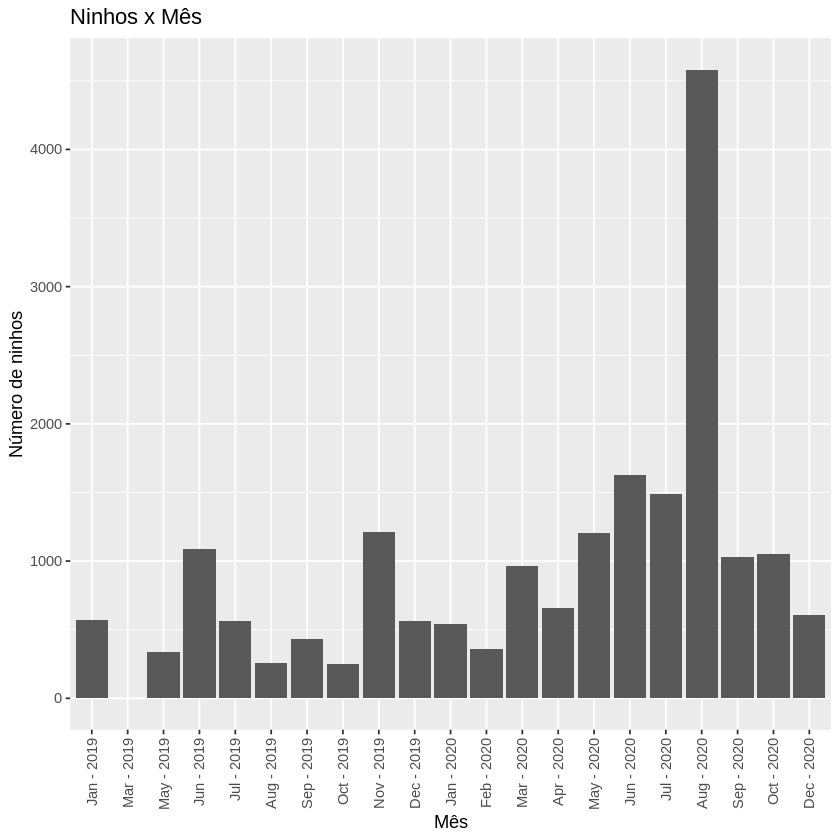

In [25]:
ggplot(aes(x=x,y=y),data=data)+geom_bar(stat="identity")+labs(x="Mês",y="Número de ninhos")+theme (axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+labs(x="Mês",title="Ninhos x Mês") 